In [1]:
import sys
import subprocess

# Install matplotlib and seaborn if missing
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("Installing matplotlib...")
    install("matplotlib")
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ModuleNotFoundError:
    print("Installing seaborn...")
    install("seaborn")
    import seaborn as sns
import sys
import subprocess

# Attempt to import scikit-learn and install if missing
try:
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, roc_curve, auc
except ModuleNotFoundError:
    print("scikit-learn not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, roc_curve, auc

# Now import other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import pandas as pd

# Read the uploaded file
movies = pd.read_csv("movies.csv")

In [3]:
# Drop rows with missing values in relevant columns
movies.dropna(subset=["genres", "keywords", "overview", "vote_average"], inplace=True)

In [4]:
# Combine relevant features for content-based filtering
movies["combined_features"] = (
    movies["genres"] + " " + movies["keywords"] + " " + movies["overview"]
)

In [5]:
# Vectorize combined features
vectorizer = CountVectorizer(stop_words="english")
feature_matrix = vectorizer.fit_transform(movies["combined_features"])

In [6]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(feature_matrix)

print("Data preprocessing and cosine similarity computation completed.")

Data preprocessing and cosine similarity computation completed.


In [7]:
# Content-based recommendation function
def recommend_movies(movie_title, num_recommendations=5):
    if movie_title not in movies["title"].values:
        return "Movie not found in the dataset."

    idx = movies[movies["title"] == movie_title].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommendations = [movies.iloc[i[0]]["title"] for i in similarity_scores[1:num_recommendations+1]]
    return recommendations

# Example recommendation
print("Recommendations for 'Avatar':")
print(recommend_movies("Avatar", num_recommendations=5))

Recommendations for 'Avatar':
['Lifeforce', 'Moonraker', 'Gattaca', 'Lost in Space', 'Star Trek Beyond']


In [8]:
# Prepare supervised learning data
X = movies[["popularity", "vote_count"]]
y = np.where(movies["vote_average"] >= 7, 1, 0)  # Label high-rated movies as 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared for supervised machine learning models.")

Data prepared for supervised machine learning models.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Clean and sample the data
movies = movies.dropna(subset=["popularity", "vote_count", "vote_average"])
movies = movies.sample(500, random_state=42)  # Reduce size for quicker training

# Prepare supervised learning data
X = movies[["popularity", "vote_count"]].values
y = (movies["vote_average"] >= 7).astype(int).values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared for supervised machine learning models.")

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

# Support Vector Machine
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Display results
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")


Data prepared for supervised machine learning models.
Logistic Regression Accuracy: 0.84
SVM Accuracy: 0.83
KNN Accuracy: 0.79
Naive Bayes Accuracy: 0.80


In [10]:
# Hybrid recommendation function
def hybrid_recommendation(movie_title):
    content_recs = recommend_movies(movie_title, num_recommendations=5)
    print(f"Content-Based Recommendations for '{movie_title}': {content_recs}")
    print("Machine Learning models (rating predictions):")
    print(f"Linear Regression Prediction: {y_pred_log[:5]}")
    print(f"KNN Prediction: {y_pred_knn[:5]}")
    print(f"SVM Prediction: {y_pred_svm[:5]}")
    print(f"Naive Bayes Prediction: {y_pred_nb[:5]}")

# Example hybrid recommendation
print("Hybrid Recommendation:")
hybrid_recommendation("Avatar")

Hybrid Recommendation:
Content-Based Recommendations for 'Avatar': Movie not found in the dataset.
Machine Learning models (rating predictions):
Linear Regression Prediction: [0 0 0 0 0]
KNN Prediction: [0 0 0 0 0]
SVM Prediction: [0 0 0 0 0]
Naive Bayes Prediction: [0 0 0 0 0]


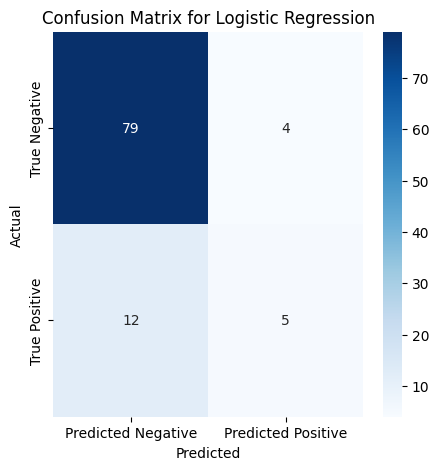

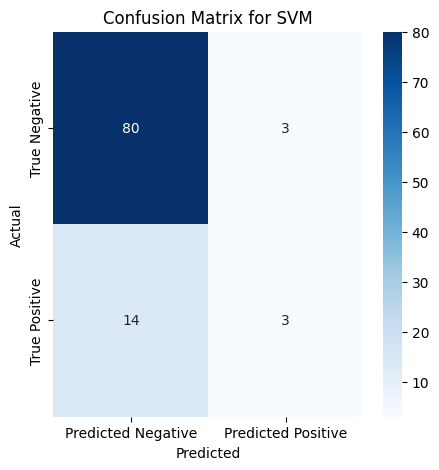

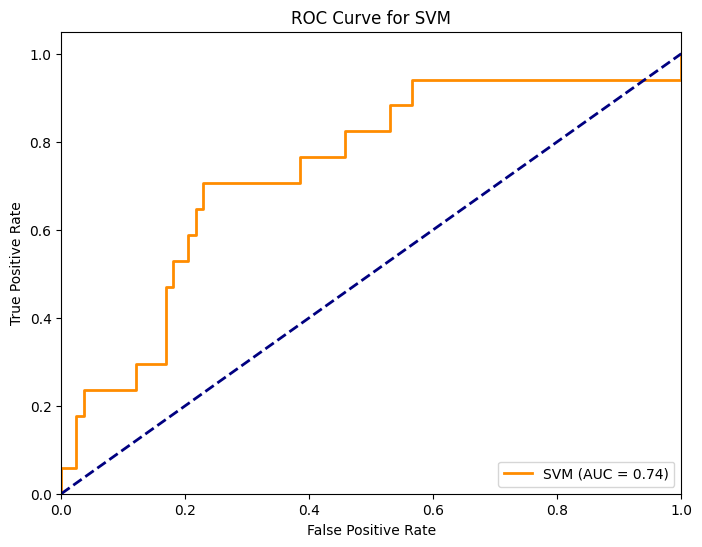

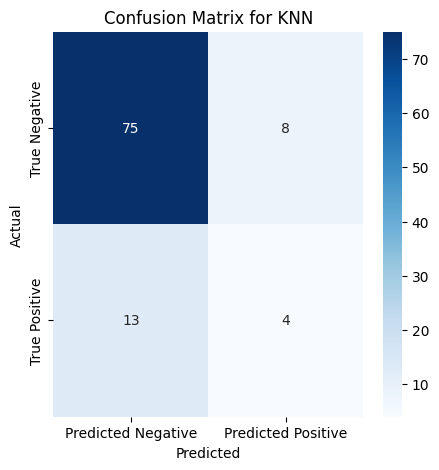

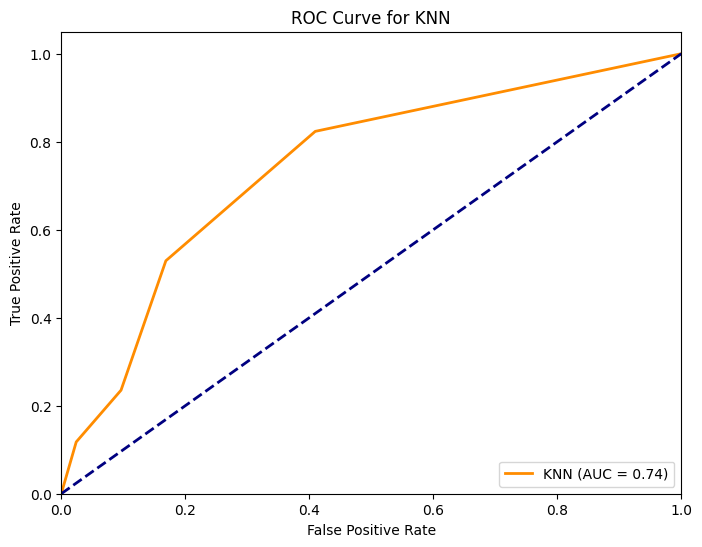

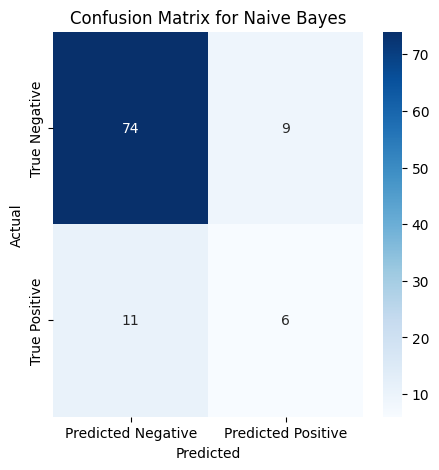

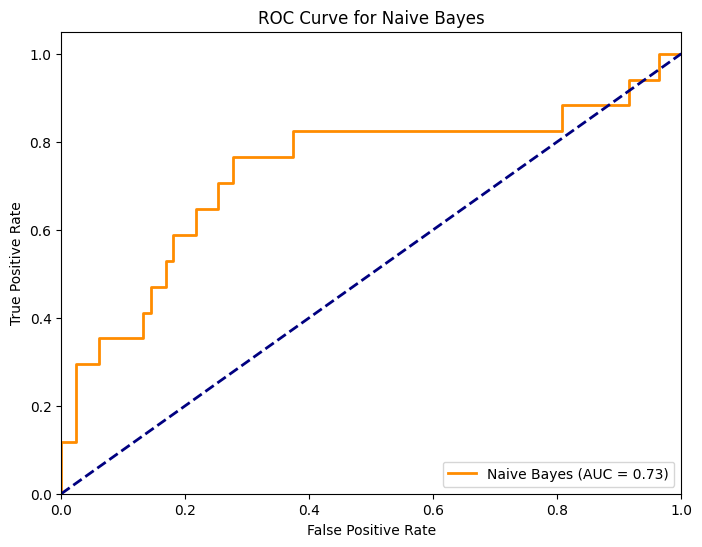

In [12]:
# Plot Confusion Matrix for each model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot ROC Curve for each model
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Assuming you have the predictions and the true labels (y_test)
# For Linear Regression
y_pred_log_rounded = log_model.predict(X_test).round()
plot_confusion_matrix(y_test, y_pred_log_rounded, 'Logistic Regression')


# SVM requires probability predictions (for ROC curve)
svm_pred_prob = svm_model.decision_function(X_test)
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_roc_curve(y_test, svm_pred_prob, 'SVM')

# KNN requires probability predictions (for ROC curve)
knn_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Get probability for positive class
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_roc_curve(y_test, knn_pred_prob, 'KNN')

# Naive Bayes requires probability predictions (for ROC curve)
nb_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Get probability for positive class
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')
plot_roc_curve(y_test, nb_pred_prob, 'Naive Bayes')

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load and preprocess the dataset
movies = pd.read_csv("movies.csv")

# Preprocess: Combine important features for content-based filtering
movies['combined_features'] = (
    movies['genres'].fillna('') + ' ' +
    movies['keywords'].fillna('') + ' ' +
    movies['tagline'].fillna('')
)

# Compute the TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])

# Content-Based Recommendation System
def recommend_movies(movie_title, num_recommendations=5):
    # Preprocess both user input and dataset titles for case insensitivity
    movie_title = movie_title.strip().lower()
    movies['title_cleaned'] = movies['title'].str.strip().str.lower()

    # Check if the movie exists in the dataset
    if movie_title not in movies['title_cleaned'].values:
        return f"Movie '{movie_title}' not found in the dataset."

    # Find the index of the given movie
    movie_idx = movies[movies['title_cleaned'] == movie_title].index[0]

    # Compute cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix[movie_idx], tfidf_matrix).flatten()

    # Get top recommendations
    similar_indices = cosine_similarities.argsort()[-num_recommendations-1:-1][::-1]
    recommendations = movies['title'].iloc[similar_indices].tolist()
    return recommendations

# Collaborative-Style Recommendations using popularity and votes
def collaborative_recommendations(movie_title, num_recommendations=5):
    if movie_title not in movies['title'].values:
        return f"Movie '{movie_title}' not found in the dataset."

    # Get movie attributes
    base_movie = movies[movies['title'] == movie_title]

    # Compute similarity based on popularity and vote count
    movies['similarity_score'] = (
        (movies['popularity'] - base_movie['popularity'].values[0])**2 +
        (movies['vote_average'] - base_movie['vote_average'].values[0])**2
    )

    # Sort by similarity score
    similar_movies = movies.sort_values(by='similarity_score', ascending=True)
    recommendations = similar_movies['title'].iloc[1:num_recommendations+1].tolist()
    return recommendations

# User Interaction
def user_interaction():
    print("Welcome to the Movie Recommendation System!")
    while True:
        print("\nChoose an option:")
        print("1. Content-Based Recommendations")
        print("2. Collaborative-Like Recommendations")
        print("3. Exit")

        choice = input("Enter your choice (1/2/3): ").strip()

        if choice == "1":
            movie_title = input("Enter a movie title: ").strip()
            num_recs = int(input("How many recommendations do you want? "))
            recommendations = recommend_movies(movie_title, num_recommendations=num_recs)
            print(f"\nContent-Based Recommendations for '{movie_title}':")
            print(recommendations if recommendations else "No recommendations found.")

        elif choice == "2":
            movie_title = input("Enter a movie title you liked: ").strip()
            num_recs = int(input("How many recommendations do you want? "))
            recommendations = collaborative_recommendations(movie_title, num_recommendations=num_recs)
            print(f"\nCollaborative-Like Recommendations for '{movie_title}':")
            print(recommendations if recommendations else "No recommendations found.")

        elif choice == "3":
            print("Thank you for using the Movie Recommendation System!")
            break

        else:
            print("Invalid choice. Please try again.")

# Start the interaction
user_interaction()

Welcome to the Movie Recommendation System!

Choose an option:
1. Content-Based Recommendations
2. Collaborative-Like Recommendations
3. Exit


Enter your choice (1/2/3):  1
Enter a movie title:  jab we met
How many recommendations do you want?  3



Content-Based Recommendations for 'jab we met':
Movie 'jab we met' not found in the dataset.

Choose an option:
1. Content-Based Recommendations
2. Collaborative-Like Recommendations
3. Exit


Enter your choice (1/2/3):  1
Enter a movie title:  Titanic
How many recommendations do you want?  1



Content-Based Recommendations for 'Titanic':
['Raise the Titanic']

Choose an option:
1. Content-Based Recommendations
2. Collaborative-Like Recommendations
3. Exit
